<a href="https://colab.research.google.com/github/Pepcoders/Data-Science-December/blob/main/22-04-21-CNN/Intro_to_Conv.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [2]:
image = np.vstack([np.zeros((2,5)), np.ones((3,5))])
image2 = np.transpose(image)
kernel = np.array([
            [1, -2],
            [2, -1]
], dtype=np.float32)

print('Image', image.shape)
print('Kernel', kernel.shape)

Image (5, 5)
Kernel (2, 2)


In [3]:
print(image)
print()
print(image2)

[[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]]

[[0. 0. 1. 1. 1.]
 [0. 0. 1. 1. 1.]
 [0. 0. 1. 1. 1.]
 [0. 0. 1. 1. 1.]
 [0. 0. 1. 1. 1.]]


<img src="https://stanford.edu/~shervine/teaching/cs-230/illustrations/convolution-layer-a.png?1c517e00cb8d709baf32fc3d39ebae67" width="919" height="399" alt="">

In [4]:
images = np.array([image, image2])
images = images.reshape(2, 5, 5, 1)
kernel = kernel.reshape(2, 2, 1, 1)

In [5]:
image_edge = tf.nn.conv2d(
    input=images,
    filters=kernel,
    strides=1,
    padding='VALID',
)

In [6]:
print(image_edge[0].numpy().reshape((4, 4)))
print()
print(image_edge[1].numpy().reshape((4, 4)))


[[0. 0. 0. 0.]
 [1. 1. 1. 1.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]

[[ 0. -3.  0.  0.]
 [ 0. -3.  0.  0.]
 [ 0. -3.  0.  0.]
 [ 0. -3.  0.  0.]]


# Convolve Image

(2, 427, 640, 3)
(5, 5, 3, 2) float64
(2, 423, 636, 2)


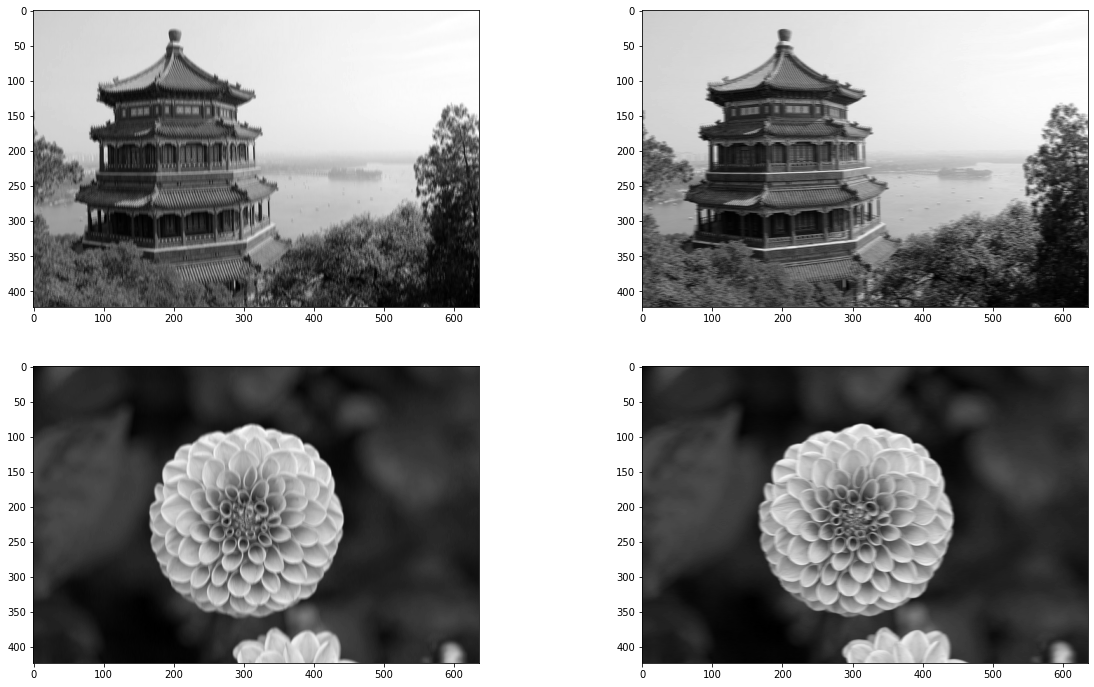

In [7]:
from sklearn.datasets import load_sample_image

china = load_sample_image('china.jpg') / 255
flower = load_sample_image('flower.jpg')/ 255

images = np.array([china, flower])
batch, height, width, channels = images.shape
print(images.shape)

K=2
# filters = np.random.rand(5,5, channels, 1)
filters = np.zeros((5,5, channels, K))
filters[:, 3, :, 0] = 1
filters[3, :, :, 1] = 1


print(filters.shape, filters.dtype)

image_output = tf.nn.conv2d(
    input=images,
    filters=filters,
    strides=1,
    padding='VALID',
)
print(image_output.shape)

plt.figure(figsize=(20, 12))
for i in range(batch):
    for k in range(K):
        plt.subplot(2, 2, i*K + k + 1)
        h, w = image_output.shape[1], image_output.shape[2]
        plt.imshow(image_output[i, :, :, k].numpy().reshape((h, w)), cmap = 'gray')

# Online Image

In [8]:
url = 'https://upload.wikimedia.org/wikipedia/commons/thumb/f/f0/Valve_original_%281%29.PNG/300px-Valve_original_%281%29.PNG'

file_path = tf.keras.utils.get_file(origin = url)
image = tf.io.read_file(file_path)
image = tf.io.decode_jpeg(image, channels=3)
image.shape

147456/137289 [================================] - 0s 0us/step


TensorShape([225, 300, 3])

In [9]:
images = tf.reshape(image, [1, *image.shape])/255

sobel = np.array([
                  [1., 2., 1],
                  [0, 0, 0],
                  [-1, -2, -1],
])
filters = np.zeros((3, 3, image.shape[-1], 2))
filters[:, :, :, 0] = sobel
filters[:, :, :, 1] = np.transpose(sobel)

In [10]:
image_output = tf.nn.conv2d(
    input=images,
    filters=filters,
    strides=1,
    padding='VALID',
)
print(image_output.shape)

(1, 223, 298, 2)


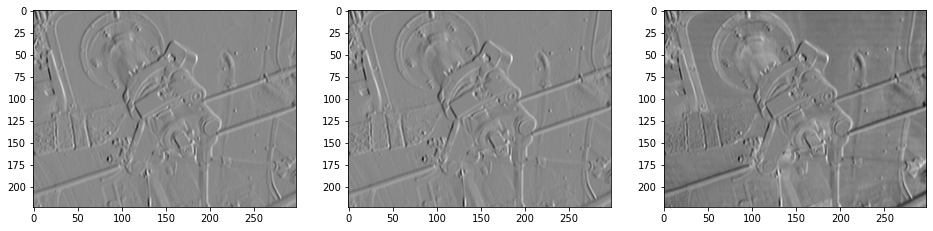

In [11]:
image_sum = tf.math.reduce_sum(image_output, axis = 3, keepdims=True)

plt.figure(figsize=(16, 10))

plt.subplot(1, 3, 1)
plt.imshow(image_output[0, :, :, 0].numpy().reshape(image_output.shape[1], image_output.shape[2]), cmap='gray')

plt.subplot(1, 3, 2)
plt.imshow(image_output[0, :, :, 0].numpy().reshape(image_output.shape[1], image_output.shape[2]), cmap='gray')

plt.subplot(1, 3, 3)
plt.imshow(image_sum[0, :, :, 0].numpy().reshape(image_output.shape[1], image_output.shape[2]), cmap='gray')


In [12]:
image_relu = tf.nn.relu(image_output)
image_sum_relu = tf.nn.relu(image_sum)

print(image_relu.shape)
print(image_sum_relu.shape)


(1, 223, 298, 2)
(1, 223, 298, 1)


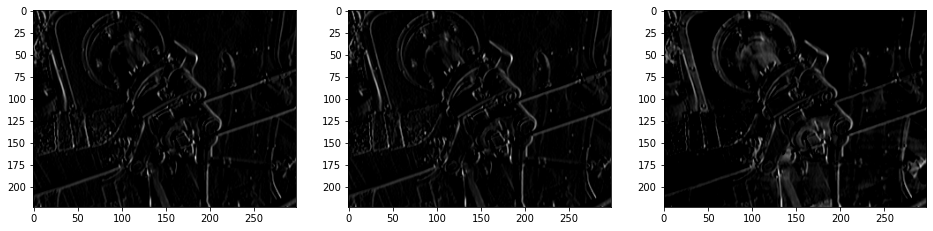

In [13]:
plt.figure(figsize=(16, 10))

plt.subplot(1, 3, 1)
plt.imshow(image_relu[0, :, :, 0].numpy().reshape(image_output.shape[1], image_output.shape[2]), cmap='gray')

plt.subplot(1, 3, 2)
plt.imshow(image_relu[0, :, :, 0].numpy().reshape(image_output.shape[1], image_output.shape[2]), cmap='gray')

plt.subplot(1, 3, 3)
plt.imshow(image_sum_relu[0, :, :, 0].numpy().reshape(image_output.shape[1], image_output.shape[2]), cmap='gray')


original shape (1, 361, 421, 1)
conv2d shape (1, 361, 421, 1)
relu shape (1, 361, 421, 1)
Pool shape (1, 361, 421, 1)


Text(0.5, 1.0, 'maxpool')

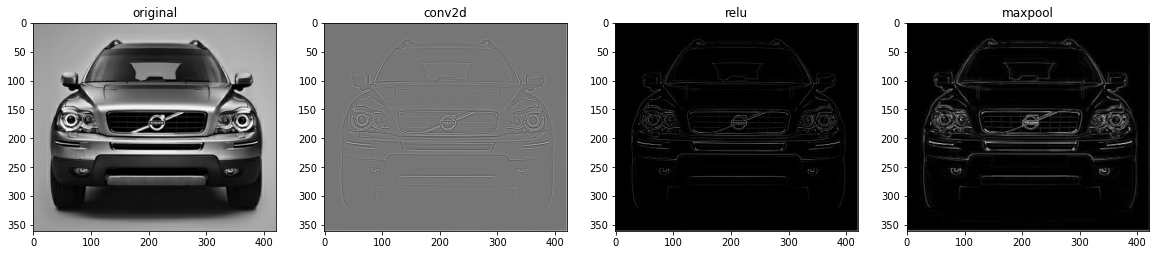

In [21]:
img_path = tf.keras.utils.get_file(origin = 'https://raw.githubusercontent.com/Diwakar-Gupta/assets_resources/main/datasets/car_feature.jpg')
image = tf.io.read_file(img_path)
image = tf.io.decode_jpeg(image, channels=1)

kernel = tf.constant([
    [-1, -1, -1],
    [-1,  8, -1],
    [-1, -1, -1],
], dtype=tf.float32)

image = tf.image.convert_image_dtype(image, dtype=tf.float32)
image = tf.expand_dims(image, axis=0)
print('original shape', image.shape)
kernel = tf.reshape(kernel, [*kernel.shape, 1, 1])

# edge detect
image_filter = tf.nn.conv2d(
    input=image,
    filters=kernel,
    strides=1,
    padding='SAME'
)
print('conv2d shape', image_filter.shape)

# relu result
image_detect = tf.nn.relu(image_filter)
print('relu shape', image_detect.shape)


img_conv = tf.nn.max_pool2d(image_detect, ksize=(2,2), strides=(1,1), padding = 'SAME')
print('Pool shape', img_conv.shape)

plt.figure(figsize=(20, 10))

plt.subplot(1, 4, 1)
plt.imshow(tf.squeeze(image), cmap='gray')
plt.title('original')

plt.subplot(1, 4, 2)
plt.imshow(tf.squeeze(image_filter), cmap='gray')
plt.title('conv2d')

plt.subplot(1, 4, 3)
plt.imshow(tf.squeeze(image_detect), cmap='gray')
plt.title('relu')

plt.subplot(1,4,4)
plt.imshow(tf.squeeze(img_conv), cmap='gray')
plt.title('maxpool')

# old shape 359, 419

Padding = "SAME"

<img src="https://i.imgur.com/RvGM2xb.gif" width="300">




Stride

Stride=(1,1)

<img src="https://i.imgur.com/LueNK6b.gif" width="300">

Stride=(2,2) = 2

<img src="https://i.imgur.com/Tlptsvt.gif" width="300">

